In [1]:
# load things
%matplotlib inline

import matplotlib.pyplot as plt

from matplotlib_colorbar import *

import numpy as np
import netCDF4

In [4]:
# load files if necessary
data_netcdf4 = netCDF4.Dataset("moc_tave_testing.nc")
sigma        = data_netcdf4.variables["sigma"][:]
latV         = data_netcdf4.variables["latV"][:]
rmoc_global  = data_netcdf4.variables["rmoc_glob_tave"][0, :, :]
data_netcdf4.close()

--- Done! ---


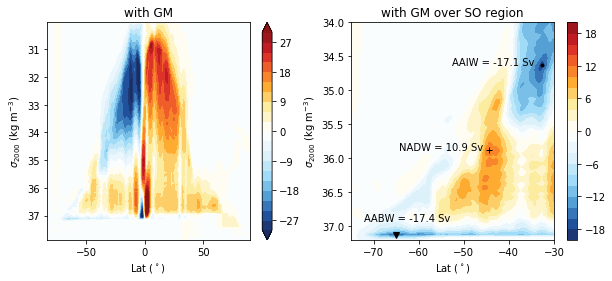

In [90]:
figure_save = False

if figure_save:
    fig = plt.figure(figsize=(5, 3), dpi = 300)
else:
    fig = plt.figure(figsize=(10, 4))
    
# global rmoc

ax1 = plt.subplot(1, 2, 1)
mesh = plt.contourf(latV, sigma, rmoc_global, np.arange(-30, 31, 3), 
                    extend = "both", cmap = BluWhiOraRed)
plt.xlabel(r"Lat (${}^\circ$)")
plt.ylabel(r"$\sigma_{2000}$ ($\mathrm{kg}\ \mathrm{m}^{-3}$)")
ax1.invert_yaxis() # flip arrays upside down (lighter density class = higher up)
plt.title("with GM")
cb = plt.colorbar()

# global rmoc over SO

ylim1 = -75
ylim2 = -30
slim1 = 34
slim2 = 37.2

# define some masks to pull out some values
# 1) NADW as max of selected domain
latV_mask  = (latV > ylim1) & (latV < ylim2)
sigma_mask = (sigma > slim1) & (sigma < slim2)
rmoc_select = rmoc_global[sigma_mask, :][:, latV_mask]
NADW_strength = np.amax(rmoc_select)
NADW_index = np.where(rmoc_select == NADW_strength)

NADW_lat = latV[latV_mask][NADW_index[1]][0]
NADW_sig = sigma[sigma_mask][NADW_index[0]][0]

# 2) AAIW as min of lighter water above sigma = 35.5
sigma_mask = (sigma < 35.5)
rmoc_select = rmoc_global[sigma_mask, :][:, latV_mask]
AAIW_strength = np.amin(rmoc_select)
AAIW_index = np.where(rmoc_select == AAIW_strength)
AAIW_lat = latV[latV_mask][AAIW_index[1]][0]
AAIW_sig = sigma[sigma_mask][AAIW_index[0]][0]

# 3) AABW as min of denser water below sigma = 35.5
sigma_mask = (sigma > 35.5)
rmoc_select = rmoc_global[sigma_mask, :][:, latV_mask]
AABW_strength = np.amin(rmoc_select)
AABW_index = np.where(rmoc_select == AABW_strength)
AABW_lat = latV[latV_mask][AABW_index[1]][0]
AABW_sig = sigma[sigma_mask][AABW_index[0]][0]

ax2 = plt.subplot(1, 2, 2)
#plt.contour(latV, sigma, rmoc_global, np.arange(-20, 21, 6), cmap = "binary")
plt.contourf(latV, sigma, rmoc_global, np.arange(-20, 21, 2), cmap = BluWhiOraRed)
plt.xlabel(r"Lat (${}^\circ$)")
plt.ylabel(r"$\sigma_{2000}$ ($\mathrm{kg}\ \mathrm{m}^{-3}$)")
plt.xlim(ylim1, ylim2)
plt.ylim(slim1, slim2)
ax2.invert_yaxis() # flip arrays upside down (lighter density class = higher up)
plt.title("with GM, over SO region")
cb = plt.colorbar()

plt.plot(NADW_lat, NADW_sig, "k+")
plt.text(NADW_lat - 20, NADW_sig, "NADW = %.1f Sv" % NADW_strength)
plt.plot(AAIW_lat, AAIW_sig, "k.")
plt.text(AAIW_lat - 20, AAIW_sig, "AAIW = %.1f Sv" % AAIW_strength)
plt.plot(AABW_lat, AABW_sig, "kv")
plt.text(AABW_lat - 7, AABW_sig - 0.2, "AABW = %.1f Sv" % AABW_strength)

if figure_save:
    fig.savefig(save_filename, bbox_inches = "tight")
    plt.close(fig)
    
print("--- Done! ---")

(array([37]), array([67]))